<a href="https://colab.research.google.com/github/ghscharf/DA-Python/blob/master/DA_Unit3_Project1_GScharf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 COVID 19 Data Analysis

# Data Background

* datasource link: https://github.com/nytimes/covid-19-data

* datafile link: https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

The data used in this analysis is a dataset on COVID-19 case count and fatality by date and state sourced from the New York Times, as linked above. 
First, I will load all of the necessary packages: pandas, numpy, and matplotlib. Then, I will import this dataset using the raw csv format of the data.

In [ ]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import dataset
covid_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

# Research Questions

* Research Question - 1  (insight into raw data, how 
many records/ columns?)

* Research Question - 2  (Subsetting data by state)

* Research Question - 3  (created new columns - new cases, new deaths, percent change)

* Research Question - 4  (visuals/ plots/ graphs/ figures) - Used pandas functions to pivot the dataframe to get the month-wise case count for NY

* Research Question - 5 (I wanted to explore plotly library in order to make interactive plots/ graphs)

# Data Wrangling

**1) basic insights:**
First, I will do a simple descriptive data analysis by identifying the shape of the dataset, i.e. the number of rows and columns - this particular dataset has 7989 rows and 5 columns which are date, state, fips, case count ("cases") and fatality ("deaths"). Next, I will run summary statistics to pull the total count, mean, standard deviation, minimum, maximum, as well as the 3 quartiles. Lastly, I will pull the first 5 and last 5 rows of the dataset to show an overview of what the DataFrame looks like.



In [ ]:
covid_df.shape

(7989, 5)

In [ ]:
covid_df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
covid_df.describe()

,fips,cases,deaths
count,7989.000000,7989.000000,7989.000000
mean,31.758793,27117.727125,1328.129052
std,18.558553,57799.106249,3694.227495
min,1.000000,1.000000,0.000000
25%,17.000000,670.000000,11.000000
50%,31.000000,5922.000000,167.000000
75%,46.000000,27598.000000,960.000000
max,78.000000,453327.000000,32295.000000


In [ ]:
covid_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
covid_df.tail()

,date,state,fips,cases,deaths
7984,2020-07-25,Virginia,51,83609,2075
7985,2020-07-25,Washington,53,53884,1592
7986,2020-07-25,West Virginia,54,5821,103
7987,2020-07-25,Wisconsin,55,51735,900
7988,2020-07-25,Wyoming,56,2446,25


**2) subsetting data by state**: The next level of my analysis involves pivoting the original dataset by state and date to pull date-level data grouped by state, thus facilitating subsetting of state-level data. I also grouped the dataset by state on case count as well as on fatality, which also gives an overview of state-level data. To simplify the grouped data, for both the case count and fatality pivots, I calculated the sum over time for each state since each row shows the count for that particular date. The resulting pivots show the *cumulative* case count and fatality by state. I also plotted both pivots, shown in Lines 56 and 57.

In [ ]:
state_pivot_df = pd.pivot_table(covid_df, index=['state', 'date'])
state_pivot_df

cases  deaths  fips
state   date                           
Alabama 2020-03-13      6       0     1
        2020-03-14     12       0     1
        2020-03-15     23       0     1
        2020-03-16     29       0     1
        2020-03-17     39       0     1
...                   ...     ...   ...
Wyoming 2020-07-21   2238      25    56
        2020-07-22   2288      25    56
        2020-07-23   2347      25    56
        2020-07-24   2405      25    56
        2020-07-25   2446      25    56

[7989 rows x 3 columns]

In [ ]:
covid_df.groupby(['state'])['cases'].sum()

state
Alabama                      2721909
Alaska                         91650
Arizona                      4949689
Arkansas                     1338727
California                  16823674
Colorado                     2771654
Connecticut                  4142479
Delaware                      934301
District of Columbia          854478
Florida                     11805318
Georgia                      6141878
Guam                          123460
Hawaii                         88550
Idaho                         535052
Illinois                    11611966
Indiana                      3752024
Iowa                         2150909
Kansas                       1157017
Kentucky                     1221312
Louisiana                    5176349
Maine                         249567
Maryland                     5266474
Massachusetts                9559174
Michigan                     6349174
Minnesota                    2536532
Mississippi                  2021628
Missouri                     177

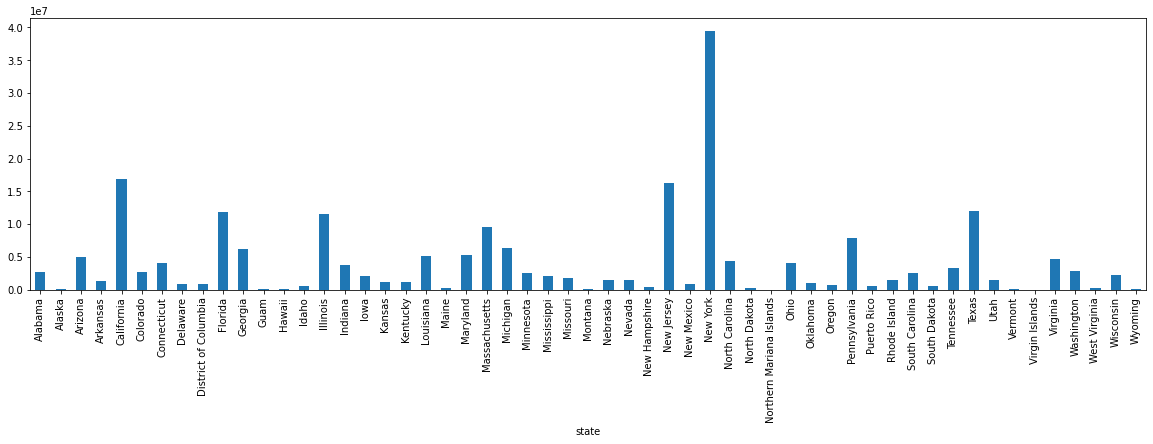

In [ ]:
covid_df.groupby(['state'])['cases'].sum().plot(kind='bar', figsize=(20,5))

In [ ]:
covid_df.groupby(['state'])['deaths'].sum()

state
Alabama                       71519
Alaska                         1092
Arizona                      121418
Arkansas                      18338
California                   466153
Colorado                     139081
Connecticut                  365667
Delaware                      36383
District of Columbia          43657
Florida                      280707
Georgia                      216104
Guam                            683
Hawaii                         1837
Idaho                          8800
Illinois                     538202
Indiana                      211623
Iowa                          51490
Kansas                        23007
Kentucky                      46998
Louisiana                    287075
Maine                          8867
Maryland                     244162
Massachusetts                651177
Michigan                     546729
Minnesota                    103921
Mississippi                   78755
Missouri                      78669
Montana               

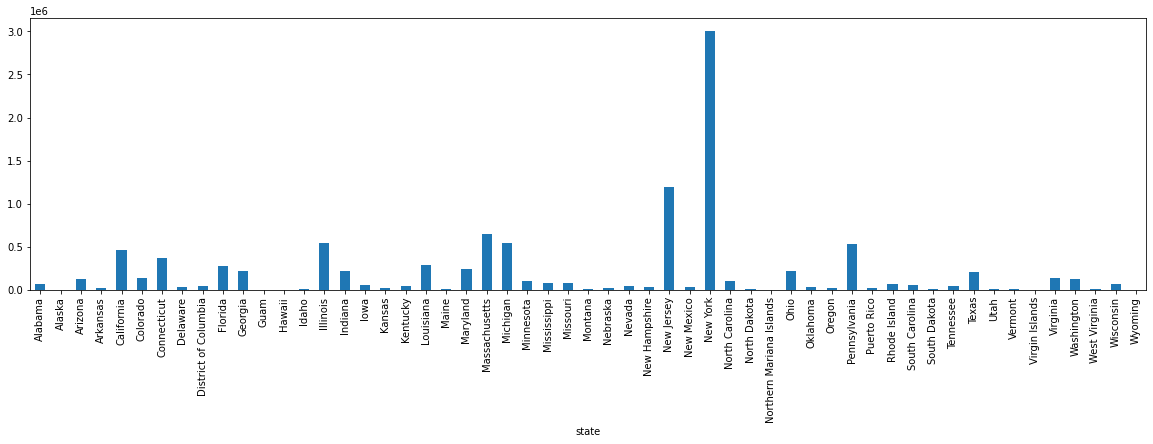

In [ ]:
covid_df.groupby(['state'])['deaths'].sum().plot(kind='bar', figsize=(20,5))

**3) creat new columns:** Now I will modify the state-level pivot dataset by adding 3 new columns. First I will add a column that reflects the number of new cases from one date to the next. To do this I will have to calculate the difference in case count between each row using a for loop. The result with the new column "new cases" is shown in Line 13. The next column to be added is the number of new deaths, which is calculated using the same method as previously, and the result with new columns "new cases" as well as "new deaths" is shown in Line 16. The last column to be added is percent change. I will calculate the percentage change of new case count, which is shown in Line 17. To make it easier to read, I converted the percent change values to percentage rounded up to 2 decimal points, shown in Line 18.

In [ ]:
#new cases

new_cases = []
previous_case = 0
for index, row in state_pivot_df.iterrows():
  current_case = row['cases']
  new_case_count = current_case - previous_case
  previous_case = current_case
  new_cases.append(new_case_count)

In [ ]:
state_pivot_df['new cases'] = new_cases

In [ ]:
state_pivot_df.head(20)

cases  deaths  fips  new cases
state   date                                      
Alabama 2020-03-13      6       0     1          6
        2020-03-14     12       0     1          6
        2020-03-15     23       0     1         11
        2020-03-16     29       0     1          6
        2020-03-17     39       0     1         10
        2020-03-18     51       0     1         12
        2020-03-19     78       0     1         27
        2020-03-20    106       0     1         28
        2020-03-21    131       0     1         25
        2020-03-22    157       0     1         26
        2020-03-23    196       0     1         39
        2020-03-24    242       0     1         46
        2020-03-25    386       1     1        144
        2020-03-26    538       3     1        152
        2020-03-27    639       4     1        101
        2020-03-28    720       4     1         81
        2020-03-29    830       5     1        110
        2020-03-30    947      11     1        117
        2020-03-31    999      14     1         52
        2020-04-01   1108      28     1        109

In [ ]:
#new deaths

new_deaths = []
previous_death = 0
for index, row in state_pivot_df.iterrows():
  current_death = row['deaths']
  new_death_count = current_death - previous_death
  previous_death = current_death
  new_deaths.append(new_death_count)

In [ ]:
state_pivot_df['new deaths'] = new_deaths

In [ ]:
state_pivot_df

cases  deaths  fips  new cases  new deaths
state   date                                                  
Alabama 2020-03-13      6       0     1          6           0
        2020-03-14     12       0     1          6           0
        2020-03-15     23       0     1         11           0
        2020-03-16     29       0     1          6           0
        2020-03-17     39       0     1         10           0
...                   ...     ...   ...        ...         ...
Wyoming 2020-07-21   2238      25    56         51           1
        2020-07-22   2288      25    56         50           0
        2020-07-23   2347      25    56         59           0
        2020-07-24   2405      25    56         58           0
        2020-07-25   2446      25    56         41           0

[7989 rows x 5 columns]

In [ ]:
#percent change

state_pivot_df['new cases'].pct_change()

state    date      
Alabama  2020-03-13         NaN
         2020-03-14    0.000000
         2020-03-15    0.833333
         2020-03-16   -0.454545
         2020-03-17    0.666667
                         ...   
Wyoming  2020-07-21   -0.163934
         2020-07-22   -0.019608
         2020-07-23    0.180000
         2020-07-24   -0.016949
         2020-07-25   -0.293103
Name: new cases, Length: 7989, dtype: float64

In [ ]:
state_pivot_df['case percent change'] = round((state_pivot_df['new cases'].pct_change())* 100,2)
state_pivot_df

cases  deaths  ...  new deaths  case percent change
state   date                       ...                                 
Alabama 2020-03-13      6       0  ...           0                  NaN
        2020-03-14     12       0  ...           0                 0.00
        2020-03-15     23       0  ...           0                83.33
        2020-03-16     29       0  ...           0               -45.45
        2020-03-17     39       0  ...           0                66.67
...                   ...     ...  ...         ...                  ...
Wyoming 2020-07-21   2238      25  ...           1               -16.39
        2020-07-22   2288      25  ...           0                -1.96
        2020-07-23   2347      25  ...           0                18.00
        2020-07-24   2405      25  ...           0                -1.69
        2020-07-25   2446      25  ...           0               -29.31

[7989 rows x 6 columns]

**4) visualization** - To generate a sample graph, I will use pandas functions to pivot the dataframe to get the monthly case count for NY. First I will drill down the original dataset to NY only (Line 19), then convert each date value into month format under a new column called "month" (Lines 21-22). To get the monthly case count, I will sum up the case count for each month using an aggregate function (Line 23). The result is plotted using a bar graph, shown in Line 26.

In [ ]:
#select NY subset
ny_df = covid_df[covid_df['state'] == 'New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
ny_df['month'] = pd.DatetimeIndex(ny_df['date']).month


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ny_df

,date,state,fips,cases,deaths,month
246,2020-03-01,New York,36,1,0,3
261,2020-03-02,New York,36,1,0,3
276,2020-03-03,New York,36,2,0,3
293,2020-03-04,New York,36,11,0,3
313,2020-03-05,New York,36,22,0,3
...,...,...,...,...,...,...
7747,2020-07-21,New York,36,412889,32218,7
7802,2020-07-22,New York,36,413595,32228,7
7857,2020-07-23,New York,36,414405,32270,7
7912,2020-07-24,New York,36,415163,32278,7


In [ ]:
ny_monthly_df = ny_df.pivot_table(index='month',values='cases',aggfunc='sum')
ny_monthly_df

,cases
month,
3,464981
4,6328973
5,10850463
6,11656829
7,10182091


In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(ny_df,x='month',y='cases')
fig.show()


# EDA (Exploratoty Data Analysis)

In this last level of analysis, I will explore the plotly library in order to make an interactive graph showing time series data. I will use New York as the use case for the sake of simplicity, and plot the daily case count over time. To make it interactive, I will insert a range slider which will allow for easy trending over a specified time period from days to years. The resulting plot, however, fails to show in Colab despite successful run of the code (Line 42). This is possibly due to problems with the plotly import. I aim to troubleshoot this particular issue following this analysis.

In [ ]:
import plotly.graph_objects as go

In [ ]:
ny_df

,date,state,fips,cases,deaths,month
246,2020-03-01,New York,36,1,0,3
261,2020-03-02,New York,36,1,0,3
276,2020-03-03,New York,36,2,0,3
293,2020-03-04,New York,36,11,0,3
313,2020-03-05,New York,36,22,0,3
...,...,...,...,...,...,...
7747,2020-07-21,New York,36,412889,32218,7
7802,2020-07-22,New York,36,413595,32228,7
7857,2020-07-23,New York,36,414405,32270,7
7912,2020-07-24,New York,36,415163,32278,7


In [ ]:
# Create figure
fig_ny = go.Figure()

fig_ny.add_trace(
    go.Scatter(x=list(ny_df.date), y=list(ny_df.cases)))

# Set title
fig_ny.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig_ny.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_ny.show()



# Conclusion



1.   Although the NYTimes dataset dates back to January 2020, the NY subset shows data starting from March. This reflects the onset of COVID in NY compared to other states such as Washington, which is where the first known case of COVID-19 was identified.
2.   Across the country, New York State has the highest cumulative case count as well as cumulative fatality.
3. Looking at the NYS subset, the monthly case count was on a significant upward trend from March to May, but one can clearly see that the curve begins to flatten between May and June, and the case count actually dipped from June to July.





# References:

* https://github.com/nytimes/covid-19-data
* https://pandas.pydata.org/ 
* https://plotly.com/python/range-slider/
* https://plotly.com/python/
* https://seaborn.pydata.org/
* https://matplotlib.org/